In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#import data
business_class_df = pd.read_csv("business_class_price.csv")
business_class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        93487 non-null  object
 1   airline     93487 non-null  object
 2   ch_code     93487 non-null  object
 3   num_code    93487 non-null  int64 
 4   dep_time    93487 non-null  object
 5   from        93487 non-null  object
 6   time_taken  93487 non-null  object
 7   stop        93487 non-null  object
 8   arr_time    93487 non-null  object
 9   to          93487 non-null  object
 10  price       93487 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.8+ MB


In [3]:
business_class_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


Text(0.5, 0, 'Business Class Price')

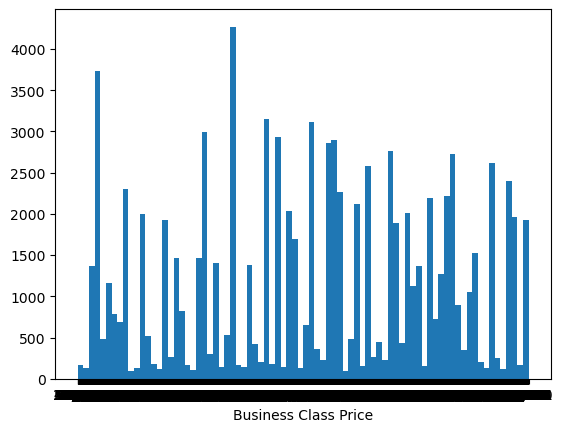

In [4]:
#plot target variable
plt.hist(business_class_df['price'], bins=80)
plt.xlabel('Business Class Price')

In [5]:
business_class_df.price.unique()

array(['25,612', '42,220', '44,450', ..., '74,731', '15,000', '77,105'],
      dtype=object)

In [6]:
business_class_df.to.value_counts()

Mumbai       18991
Delhi        16707
Bangalore    16198
Kolkata      14758
Hyderabad    13675
Chennai      13158
Name: to, dtype: int64

In [7]:
business_class_df.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [9]:
#converting price string to int
business_class_df['price_int'] = business_class_df['price'].str.replace(r"[^\d\-+\.]", "", regex=True)
# convert price column to integer
business_class_df['price_int'] = pd.to_numeric(business_class_df['price_int'])

Text(0.5, 0, 'Business Class Price')

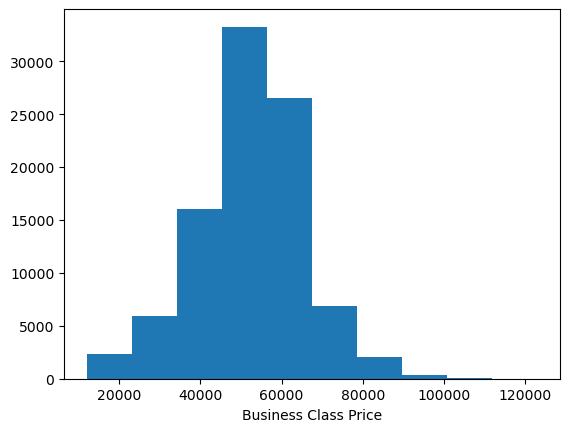

In [10]:
#plot target variable
plt.hist(business_class_df['price_int'], bins=10)
plt.xlabel('Business Class Price')

In [12]:
#copying dataset it to a temp
business_class_df_copy = business_class_df.copy()

In [13]:
#Changing all the values to INT from STRING

In [14]:
business_class_df_copy['dep_time_int'] = business_class_df_copy['dep_time'].str.replace(r"[^\d\-+\.]", "", regex=True)
business_class_df_copy['dep_time_int'] = pd.to_numeric(business_class_df_copy['dep_time_int'])

business_class_df_copy['arr_time_int'] = business_class_df_copy['arr_time'].str.replace(r"[^\d\-+\.]", "", regex=True)
business_class_df_copy['arr_time_int'] = pd.to_numeric(business_class_df_copy['arr_time_int'])

business_class_df_copy['time_taken_int'] = business_class_df_copy['time_taken'].str.replace(r"[^\d\-+\.]", "", regex=True)
business_class_df_copy['time_taken_int'] = pd.to_numeric(business_class_df_copy['time_taken_int'])

In [15]:
#drop the columns not required
business_class_df_copy = business_class_df_copy.drop('arr_time', axis=1)
business_class_df_copy = business_class_df_copy.drop('dep_time', axis=1)
business_class_df_copy = business_class_df_copy.drop('price', axis=1)
business_class_df_copy = business_class_df_copy.drop('time_taken', axis=1)

In [16]:
business_class_df_copy.head()

,date,airline,ch_code,num_code,from,stop,to,price_int,dep_time_int,arr_time_int,time_taken_int
0,11-02-2022,Air India,AI,868,Delhi,non-stop,Mumbai,25612,1800,2000,200
1,11-02-2022,Air India,AI,624,Delhi,non-stop,Mumbai,25612,1900,2115,215
2,11-02-2022,Air India,AI,531,Delhi,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,42220,2000,2045,2445
3,11-02-2022,Air India,AI,839,Delhi,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,44450,2125,2355,2630
4,11-02-2022,Air India,AI,544,Delhi,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Mumbai,46690,1715,2355,640


In [17]:
#Changing categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
#Encoding from & to fields
combined_categories = business_class_df_copy['from'].append(business_class_df_copy['to']).unique()
encoder = LabelEncoder()
encoder.fit(combined_categories)
business_class_df_copy['from_encoded'] = encoder.transform(business_class_df_copy['from'])
business_class_df_copy['to_encoded'] = encoder.transform(business_class_df_copy['to'])

C:\Users\User\AppData\Local\Temp\ipykernel_22180\873230395.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_categories = business_class_df_copy['from'].append(business_class_df_copy['to']).unique()


In [18]:
#Changing categorical data to numerical data
#from sklearn.preprocessing import LabelEncoder
#Encoding ch fields
encoder = LabelEncoder()
business_class_df_copy['ch_code_encoded'] = encoder.fit_transform(business_class_df_copy['ch_code'])
business_class_df_copy['airline_encoded'] = encoder.fit_transform(business_class_df_copy['airline'])

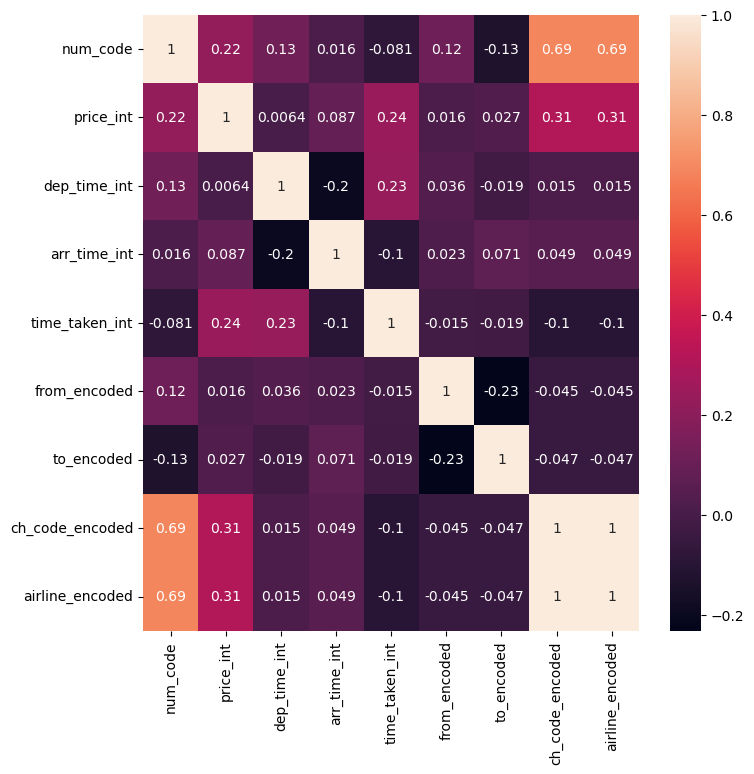

In [20]:
#Correlation map
corr = business_class_df_copy.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)
plt.show()